In [227]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

EXP_NAME = "logs/clients"
RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','size']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]    
    proxy_data = pd.read_csv(os.path.join('clients.csv'),sep=',')
    #Load results from each node
    nodes_results = None
    for sub_dir in dirs:
        client_nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir) if os.path.isdir(os.path.join(INPUT_DIR+'/'+sub_dir, f))]
        #print(client_nodes)
        for node in client_nodes:
            tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir+'/'+node)
            for tunnel in tunnel_nodes:                
                file = os.path.join(INPUT_DIR+'/'+sub_dir+'/'+node,tunnel)             
                
                
                temp_filter = proxy_data.loc[(proxy_data['proxy'] == int(tunnel)) & (proxy_data['client'] == int(sub_dir))]
                try:
                    temp = pd.read_csv(file,sep=',', header = None)
                    temp.columns = headers
                    temp = temp.query('status == 200 & size >0')
                    #temp = temp.set_index(pd.DatetimeIndex(temp.time))
                    temp['proxy'] = tunnel
                    temp['client'] = sub_dir
                    temp['distance'] = temp_filter.distance.iloc[0]
                    temp['hops'] = temp_filter.hops.iloc[0]
                    temp['download_time'] = temp['download'] - temp['start_transfer']
                                                           
                    nodes_results = pd.concat([nodes_results, temp])
                except Exception as e:
                    print(node, 'EXception', e)
    return nodes_results

client_data = read_clients()
#for client in client_data:
#    df = client_data[client]
#    df['download_time']= df['download'] - df['start_transfer']
#    proxies = df.proxy.unique()
#    for proxy in proxies:
#        df_proxy = df.query('proxy == "'+proxy+'"')
#        print(client,':',proxy,':',df_proxy['size'].mean(),':',df_proxy.download_time.mean())
    

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

27364


In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def plot_pca(df_clients ):
    clients = df_clients.client.unique()
    for client in clients:
        df = df_clients.query('client == "'+client+'"')
        features = ['download', 'distance']
        x = df.loc[:, features].values
        
        pca = PCA(n_components=2)
        pca.fit(x)

        plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
        for length, vector in zip(pca.explained_variance_, pca.components_):
            v = vector * 3 * np.sqrt(length)
            draw_vector(pca.mean_, pca.mean_ + v)
        plt.axis('equal')
        plt.title(client)
        plt.xlabel('Download time')
        plt.ylabel('Distance')
        plt.show()
       
    

plot_pca(client_data)
   

AttributeError: 'numpy.ndarray' object has no attribute 'distance'

/home/khulan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[ 374.99]
[[   0.419397  374.99    ]
 [   0.860981  374.99    ]
 [   0.807344  374.99    ]
 ..., 
 [   1.084985  374.99    ]
 [   1.085524  374.99    ]
 [   1.084497  374.99    ]]


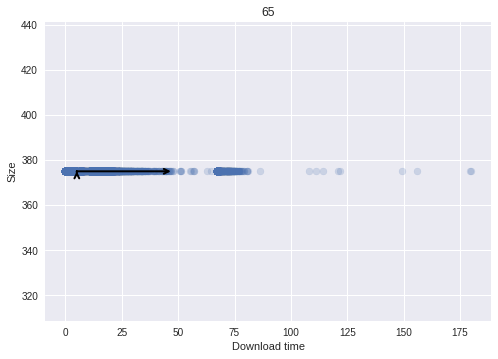

[ 333.73]
[[   0.421  333.73 ]
 [   0.429  333.73 ]
 [   0.431  333.73 ]
 ..., 
 [   1.242  333.73 ]
 [   1.214  333.73 ]
 [   1.239  333.73 ]]


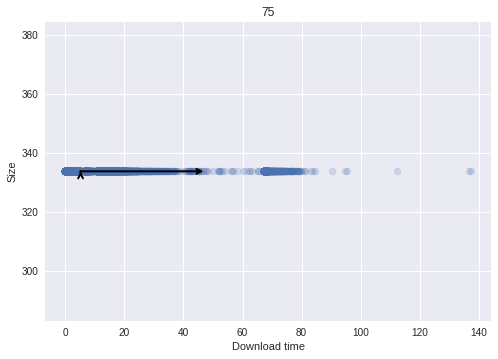

[ 335.04]
[[   0.419792  335.04    ]
 [   0.429576  335.04    ]
 [   0.794448  335.04    ]
 ..., 
 [   1.126116  335.04    ]
 [   1.103601  335.04    ]
 [   1.103755  335.04    ]]


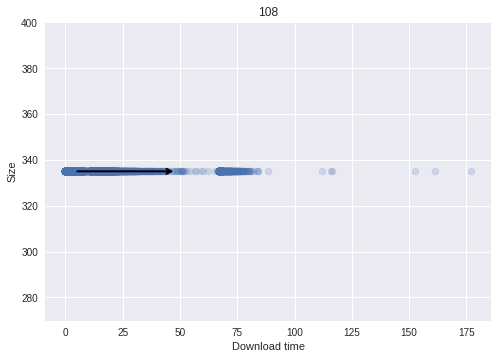

[ 361.05]
[[   0.422  361.05 ]
 [   0.435  361.05 ]
 [   0.432  361.05 ]
 ..., 
 [   1.541  361.05 ]
 [   1.427  361.05 ]
 [   1.354  361.05 ]]


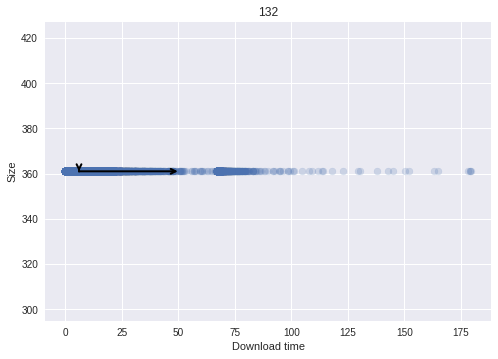

In [229]:
def plot_pca_size(df_clients):
    clients = df_clients.client.unique()
    #clients['size'] = clients['size']/1000000
    for client in clients:
        df = df_clients.query('client == "'+client+'"')
        df.size = df.size/1000
        print(df['size'].unique())
        features = ['download_time', 'size']
        x = df.loc[:, features].values
        
        print(x)
        
        pca = PCA(n_components=2)
        pca.fit(x)

        plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
        for length, vector in zip(pca.explained_variance_, pca.components_):
            v = vector * 3 * np.sqrt(length)
            draw_vector(pca.mean_, pca.mean_ + v)
        plt.axis('equal')
        plt.title(client)
        plt.xlabel('Download time')
        plt.ylabel('Size')
        plt.show()
       
    

plot_pca_size(client_data)
   

(1797, 64)